# !/usr/bin/env python
# coding: utf-8

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')
import seaborn as sns
import re
plt.style.use('ggplot')

## Loading csv File   
  - Using pandas to read the flavors_of_cacao file 
  - checking the shape of the dataframe

In [2]:
foc = pd.read_csv('flavors_of_cacao.csv')
foc.shape 

(1795, 9)

## Displaying our dataset

In [3]:
foc.head()

,company,bar_origin,REF,review_year,cocoa_percent,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,NaN,Peru



## Summary Statistics of the Dataset
    - the describe function helps give the summary stats of the dataset
    - the std,mean,min,max,percentile values

In [4]:
foc.describe(include='all')

,company,bar_origin,REF,review_year,cocoa_percent,company_location,rating,bean_type,bean_origin
count,1795,1795,1795.000000,1795.000000,1795.000000,1795,1795.000000,0.0,1794
unique,416,1039,NaN,NaN,NaN,59,NaN,NaN,97
top,Soma,Madagascar,NaN,NaN,NaN,U.S.A.,NaN,NaN,Venezuela
freq,47,57,NaN,NaN,NaN,764,NaN,NaN,214
mean,NaN,NaN,1035.904735,2012.325348,0.716983,NaN,3.185933,NaN,NaN
std,NaN,NaN,552.886365,2.927210,0.063231,NaN,0.478062,NaN,NaN
min,NaN,NaN,5.000000,2006.000000,0.420000,NaN,1.000000,NaN,NaN
25%,NaN,NaN,576.000000,2010.000000,0.700000,NaN,2.875000,NaN,NaN
50%,NaN,NaN,1069.000000,2013.000000,0.700000,NaN,3.250000,NaN,NaN
75%,NaN,NaN,1502.000000,2015.000000,0.750000,NaN,3.500000,NaN,NaN


In [5]:
foc.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
company,1795,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bar_origin,1795,1039,Madagascar,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1795,NaN,NaN,NaN,1035.9,552.886,5,576,1069,1502,1952
review_year,1795,NaN,NaN,NaN,2012.33,2.92721,2006,2010,2013,2015,2017
cocoa_percent,1795,NaN,NaN,NaN,0.716983,0.0632312,0.42,0.7,0.7,0.75,1
company_location,1795,59,U.S.A.,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1795,NaN,NaN,NaN,3.18593,0.478062,1,2.875,3.25,3.5,5
bean_type,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bean_origin,1794,97,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
foc.dtypes

company              object
bar_origin           object
REF                   int64
review_year           int64
cocoa_percent       float64
company_location     object
rating              float64
bean_type           float64
bean_origin          object
dtype: object

## Refining column names 

In [7]:
foc.rename (columns={ foc.columns[0] : 'company',
    'Specific Bean Origin\nor Bar Name': 'bar_origin',
    'REF': 'REF',
    'Review\nDate': 'review_year',
    'Cocoa\nPercent': 'cocoa_percent',
    'Company\nLocation': 'company_location',
    'Rating': 'rating',
    'Bean\nType': 'bean_type',
    'Broad Bean\nOrigin': 'bean_origin'
}, inplace=True)
foc

,company,bar_origin,REF,review_year,cocoa_percent,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,NaN,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,NaN,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,NaN,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,NaN,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,NaN,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,0.70,Austria,3.75,NaN,Peru
1791,Zotter,Congo,749,2011,0.65,Austria,3.00,NaN,Congo
1792,Zotter,Kerala State,749,2011,0.65,Austria,3.50,NaN,India
1793,Zotter,Kerala State,781,2011,0.62,Austria,3.25,NaN,India


## Displaying the unique locations

In [8]:
foc['company_location'].sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'England', 'Eucador', 'Fiji', 'Finland', 'France', 'Germany',
       'Ghana', 'Grenada', 'Guatemala', 'Holland', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Lithuania', 'Madagascar', 'Martinique', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland',
       'Singapore', 'South Africa', 'South Korea', 'Spain', 'St. Lucia',
       'Suriname', 'Sweden', 'Switzerland', 'U.S.A.', 'Venezuela',
       'Vietnam', 'Wales'], dtype=object)

# Correcting Naming Mistakes in Company Location

In [9]:
foc['company_location'] = foc['company_location'].str.replace('Amsterdam', 'Holland').str.replace('U.K.', 'England').str.replace('Niacragua', 'Nicaragua').str.replace('Domincan Republic', 'Dominican Republic')

foc['company_location'].sort_values().unique()

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Bolivia',
       'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica',
       'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador',
       'England', 'Eucador', 'Fiji', 'Finland', 'France', 'Germany',
       'Ghana', 'Grenada', 'Guatemala', 'Holland', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Lithuania', 'Madagascar', 'Martinique', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Peru', 'Philippines', 'Poland',
       'Portugal', 'Puerto Rico', 'Russia', 'Sao Tome', 'Scotland',
       'Singapore', 'South Africa', 'South Korea', 'Spain', 'St. Lucia',
       'Suriname', 'Sweden', 'Switzerland', 'U.S.A.', 'Venezuela',
       'Vietnam', 'Wales'], dtype=object)

# Converting cocoa_percent values to decimal values

In [12]:
foc["cocoa_percent"] = foc["cocoa_percent"].replace("%","").astype(float)/100

## Correcting Naming Mistakes in Baen Origin

In [13]:
foc['bean_origin'].sort_values().unique()

array([' ', 'Africa,Carribean,Central America', 'Australia', 'Belize',
       'Bolivia', 'Brazil', 'Burma', 'Cameroon', 'Carribean',
       'Carribean,Dominican Republic,Jamaica, Trinidad',
       'Central,South America', 'Colombia', 'Colombia,Ecuador', 'Congo',
       'Costa Rica', 'Costa Rica,Venezuela,', 'Cuba',
       'Dominican Republic', 'Dominican Republic,Bali',
       'Dominican Republic,Ecuador,Peru', 'Dominican Republic,Madagascar',
       'Ecuador', 'Ecuador,Costa Rica',
       'Ecuador,Madagascar,Papua New Guinea', 'El Salvador', 'Fiji',
       'Gabon', 'Ghana', 'Ghana, Madagascar', 'Ghana,Dominican Republic',
       'Ghana,Panama,Ecuador', 'Grenada',
       'Grenada, Papua New Guinea, Hawaii, Haiti,Madagascar,',
       'Guatemala',
       'Guatemala, Dominican Republic,Peru,Madagascar,Papua New Guinea',
       'Haiti', 'Hawaii', 'Honduras', 'India', 'Indonesia',
       'Indonesia,Ghana', 'Ivory Coast', 'Jamaica', 'Liberia',
       'Madagascar', 'Madagascar, Ecuador',
    

In [14]:
def txt_prep(text):
    replacements = [
        ['Ven,|Ven$|Venez,|Venez$', 'Venezuela, '],
        ['-', ', '], 
        ['/ ', ', '], 
        ['/', ', '], 
        ['\(', ', '], 
        [' and', ', '], 
        ['Dom Rep|DR|Domin Rep|Dominican Rep,|Domincan Republic', 'Dominican Republic'],
        ['Mad,|Mad$', 'Madagascar, '],
        [',\s+', ','],
        ['PNG', 'Papua New Guinea, '],
        [' &', ', '], 
        ['\)', ''],
        ['Guat,|Guat$', 'Guatemala, '],
        ['Haw,|Haw$', 'Hawaii, '],
        ['Ecu,|Ecu$|Ecuad,|Ecuad$', 'Ecuador, '],
         [' Bali', ',Bali'],
        ['Nic,|Nic$', 'Nicaragua, '],
        ['Cost Rica', 'Costa Rica'],
        ['Mex,|Mex$', 'Mexico, '],
        ['Jam,|Jam$', 'Jamaica, '],
        [', ,', ', '], 
        ['\xa0', ' '],
        ['Gre,|Gre$', 'Grenada, '],
        ['Tri,|Tri$', 'Trinidad, '],
        ['C Am', 'Central America'],
        ['S America', 'South America'],
        [', $', ''], 
        [',  ', ', ']
       
    ]
    for i, j in replacements:
        text = re.sub(i, j, str(text))
    return text

In [15]:
foc['bean_origin'].str.replace('.', '').apply(txt_prep).unique()

array(['Sao Tome', 'Togo', 'Peru', 'Venezuela', 'Cuba', 'Panama',
       'Madagascar', 'Brazil', 'Ecuador', 'Colombia', 'Burma',
       'Papua New Guinea', 'Bolivia', 'Fiji', 'Mexico', 'Indonesia',
       'Trinidad', 'Vietnam', 'Nicaragua', 'Tanzania',
       'Dominican Republic', 'Ghana', 'Belize', ' ', 'Jamaica', 'Grenada',
       'Guatemala', 'Honduras', 'Costa Rica', 'Haiti', 'Congo',
       'Philippines', 'Malaysia', 'Dominican Republic,Bali',
       'Venezuela,Africa,Brasil,Peru,Mexico', 'Gabon', 'Ivory Coast',
       'Carribean', 'Sri Lanka', 'Puerto Rico', 'Uganda', 'Martinique',
       'Sao Tome,Principe', 'Vanuatu', 'Australia', 'Liberia',
       'Ecuador,Costa Rica', 'West Africa', 'Hawaii', 'St Lucia',
       'Costa Rica,Venezuela,', 'Peru,Madagascar', 'Venezuela,Trinidad',
       'Trinidad,Tobago', 'Venezuela,Trinidad,Ecuador',
       'South America,Africa', 'India',
       'Africa,Carribean,Central America', 'Tobago',
       'Venezuela,Indonesia,Ecuador', 'Peru,Ecuador,Ve

In [16]:
foc['bean_origin'] = foc['bean_origin'].str.replace('.', '').apply(txt_prep)

 # Check and Changing Empty Cells to None

In [17]:
foc.isnull().any()

company             False
bar_origin          False
REF                 False
review_year         False
cocoa_percent       False
company_location    False
rating              False
bean_type            True
bean_origin         False
dtype: bool

In [18]:

def space_change(x):
    if(x == "\xa0" ):
        return "None"
    elif( x == ""):
         return "None"

In [19]:
foc['bean_type'] = foc['bean_type'].apply(space_change)
foc.head()

,company,bar_origin,REF,review_year,cocoa_percent,company_location,rating,bean_type,bean_origin
0,A. Morin,Agua Grande,1876,2016,0.0063,France,3.75,None,Sao Tome
1,A. Morin,Kpime,1676,2015,0.0070,France,2.75,None,Togo
2,A. Morin,Atsane,1676,2015,0.0070,France,3.00,None,Togo
3,A. Morin,Akata,1680,2015,0.0070,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,0.0070,France,3.50,None,Peru


In [20]:
foc.isnull().sum()

company                0
bar_origin             0
REF                    0
review_year            0
cocoa_percent          0
company_location       0
rating                 0
bean_type           1795
bean_origin            0
dtype: int64

# Data Visualization

U.S.A.     764
France     156
Canada     125
England     96
Italy       63
Name: company_location, dtype: int64


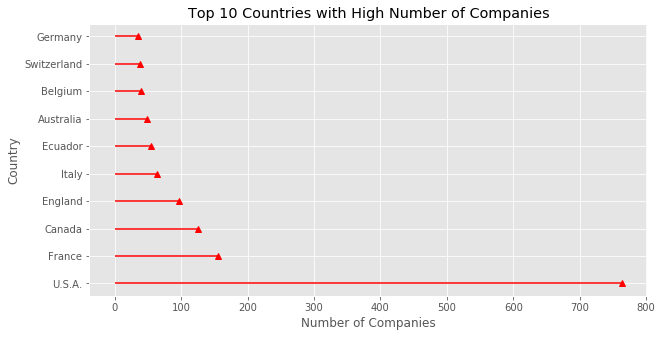

In [21]:
country=list(foc['company_location'].value_counts().head(10).index)
choco_bars=list(foc['company_location'].value_counts().head(10))
prod_ctry=dict(zip(country,choco_bars))
print(foc['company_location'].value_counts().head())

plt.figure(figsize=(10,5))
plt.hlines(y=country,xmin=0,xmax=choco_bars,color='red')
plt.plot(choco_bars,country,"r^")
plt.xlabel('Number of Companies')
plt.ylabel('Country')
plt.title("Top 10 Countries with High Number of Companies")
plt.show()

## Bar Plot
    - top 10 Countries and Average Cocoa Percentage Used

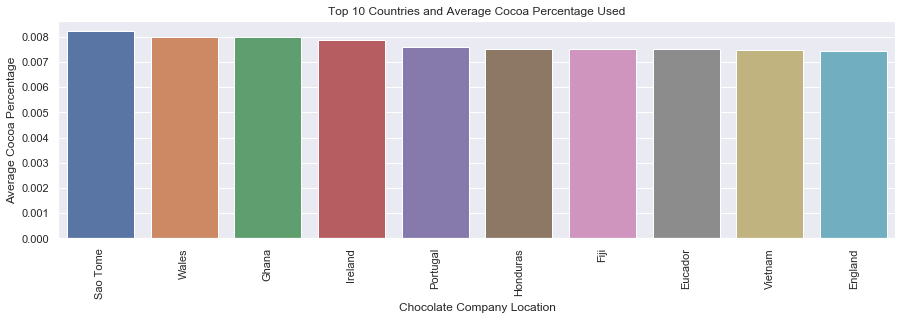

In [22]:
a1 = foc.groupby('company_location').aggregate({'cocoa_percent':'mean'})
a1 = a1.sort_values('cocoa_percent', ascending = False).head(10)
a1 = a1.reset_index()

sns.set()
plt.figure(figsize=(15, 4))
sns.barplot(x=a1.company_location, y=a1.cocoa_percent)
plt.xticks(rotation=90)
plt.xlabel("Chocolate Company Location")
plt.ylabel("Average Cocoa Percentage")
plt.title("Top 10 Countries and Average Cocoa Percentage Used")
plt.show()

## Bar Plot
   -To ten companies by Average Rating

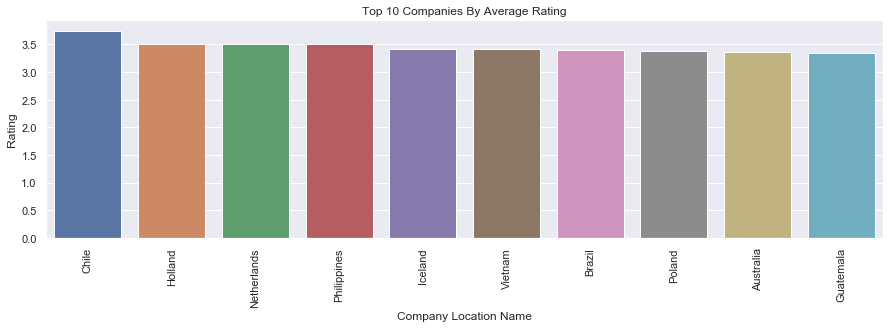

In [23]:
d5 = foc.groupby('company_location').aggregate({'rating':'mean'})
d5 = d5.sort_values('rating', ascending = False).head(10)
d5 = d5.reset_index()

sns.set()
plt.figure(figsize=(15, 4))
sns.barplot(x=d5.company_location, y=d5.rating)
plt.xticks(rotation=90)
plt.xlabel("Company Location Name")
plt.ylabel("Rating")
plt.title("Top 10 Companies By Average Rating")
plt.show()

## LinePlot
    - Cocoa Percentage Patterns Per Year

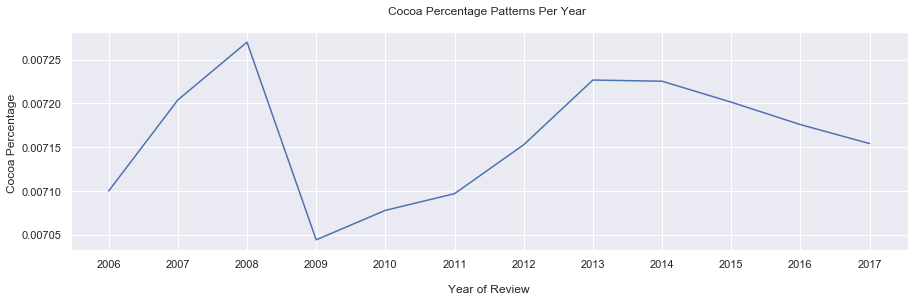

In [24]:
d6 = foc.groupby('review_year').aggregate({'cocoa_percent':'mean'})
d6 = d6.reset_index()
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_year', y='cocoa_percent', data=d6)
ax.set(xticks=d6.review_year.values)
plt.xlabel("\nYear of Review")
plt.ylabel("Cocoa Percentage ")
plt.title("Cocoa Percentage Patterns Per Year \n")
plt.show()

## Lineplot
    -Average Rating Percentage Per Year

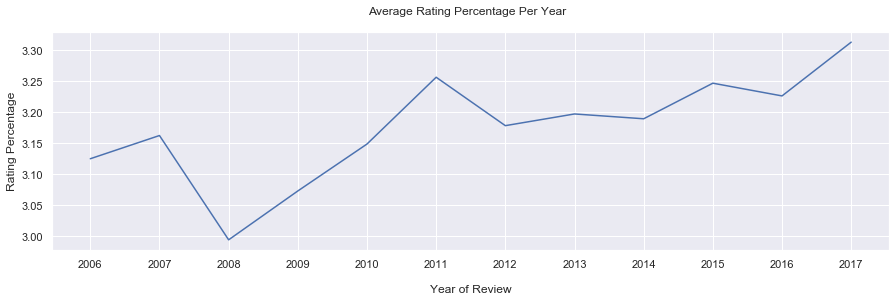

In [25]:
d7 = foc.groupby('review_year').aggregate({'rating':'mean'})
d7 = d7.reset_index()
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_year', y='rating', data=d7)
ax.set(xticks=d7.review_year.values)
plt.xlabel("\nYear of Review")
plt.ylabel("Rating Percentage")
plt.title("Average Rating Percentage Per Year  \n")
plt.show()

## Count Plot
    - Rating Frequencies

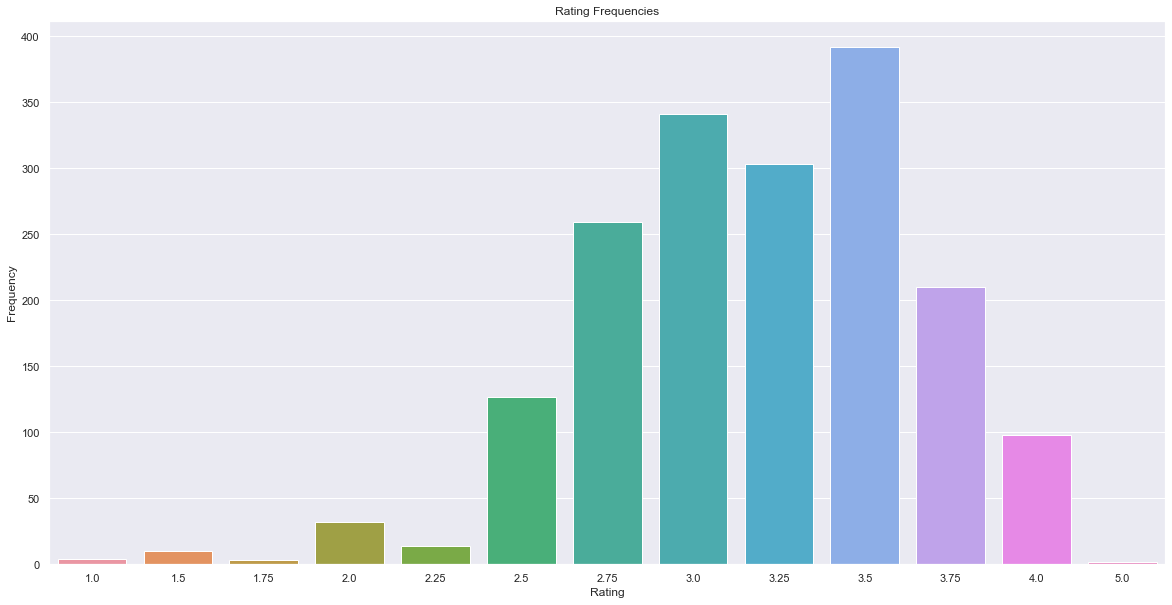

In [26]:
plt.figure(figsize=(20,10))
sns.countplot(foc.rating)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title("Rating Frequencies");

## Count Plot
    - Total Chocolate Bars By Rating

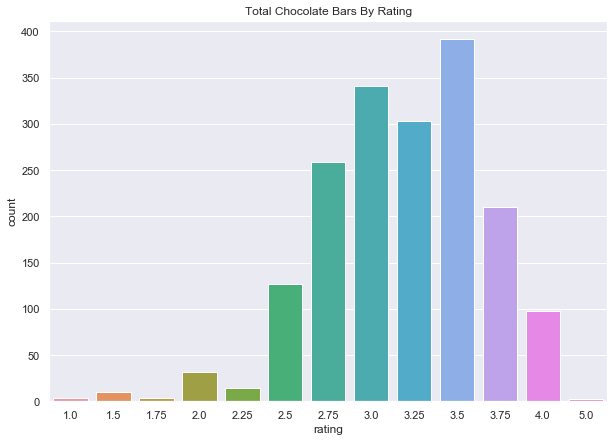

In [27]:
plt.figure(figsize=(10,7))
sns.countplot(foc.rating)
plt.title("Total Chocolate Bars By Rating");

In [28]:
def rate_merger(x):
    if x < 2.0:
        return 1
    elif 2.0 <= x < 3.0:
        return 2
    elif 3.0 <= x < 3.75:
        return 3
    elif 3.75 <= x < 4.0:
        return 3.75
    elif 4.0 <= x < 5.0:
        return 4
    elif x == 5:
        return 5
    else:
        return "Unknown"
    
foc['new_rating']= foc['rating'].apply(rate_merger)


## count plot
    -Toatl Chocolate Bars By Rating Category
    - Cocoa Percentage Patterns Per Year

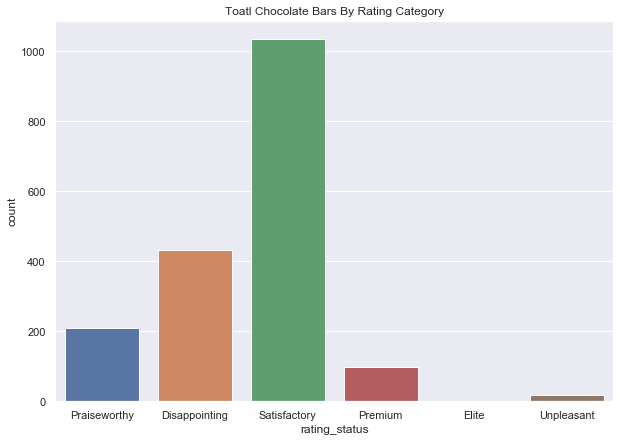

In [29]:
def rate_merger(x):
    if x < 2.0:
        return "Unpleasant"
    elif 2.0 <= x < 3.0:
        return "Disappointing"
    elif 3.0 <= x < 3.75:
        return "Satisfactory"
    elif 3.75 <= x < 4.0:
        return "Praiseworthy"
    elif 4.0 <= x < 5.0:
        return "Premium"
    elif x == 5:
        return "Elite"
    else:
        return "Unknown"
    
foc['rating_status']=foc['rating'].apply(rate_merger)

plt.figure(figsize=(10,7))
sns.countplot(foc.rating_status)
plt.title("Cocoa Percentage Patterns Per Year \n")
plt.title("Toatl Chocolate Bars By Rating Category");

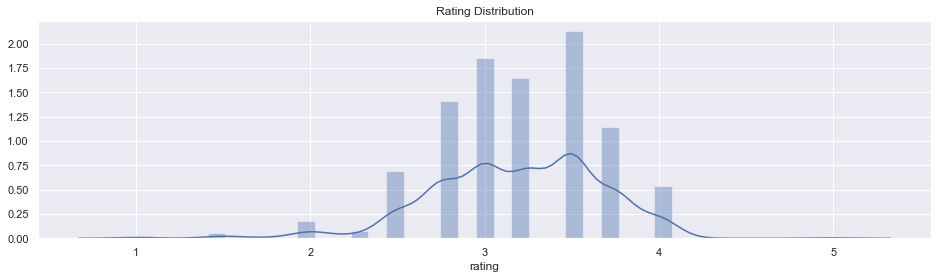

In [30]:
fig, ax= plt.subplots(figsize=[16,4])
sns.distplot(foc['rating'])
ax.set_title('Rating Distribution')
plt.show()

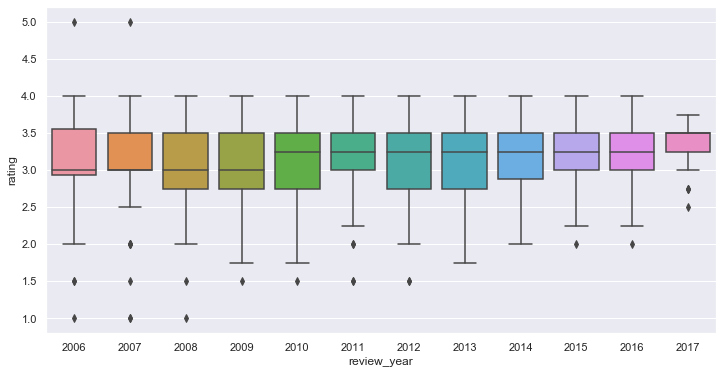

In [31]:
foc['review_year'] = foc['review_year'].astype(str)
plt.figure(figsize=(12,6))
sns.boxplot(x='review_year', y='rating',data=foc)

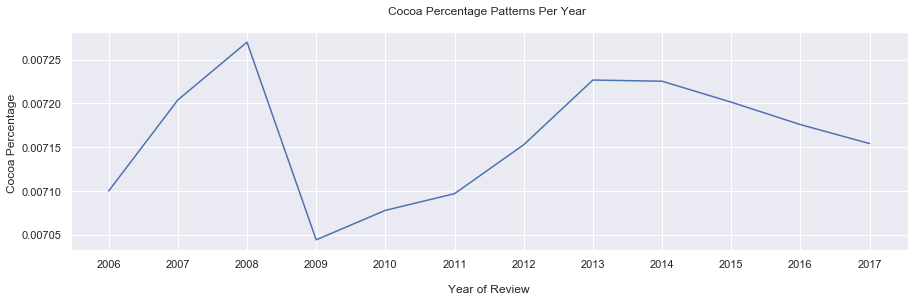

In [32]:
d5 = foc.groupby('review_year').aggregate({'cocoa_percent':'mean'})
d5 = d5.reset_index()
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_year', y='cocoa_percent', data=d5)
ax.set(xticks=d5.review_year.values)
plt.xlabel("\nYear of Review")
plt.ylabel("Cocoa Percentage ")
plt.title("Cocoa Percentage Patterns Per Year \n")
plt.show()

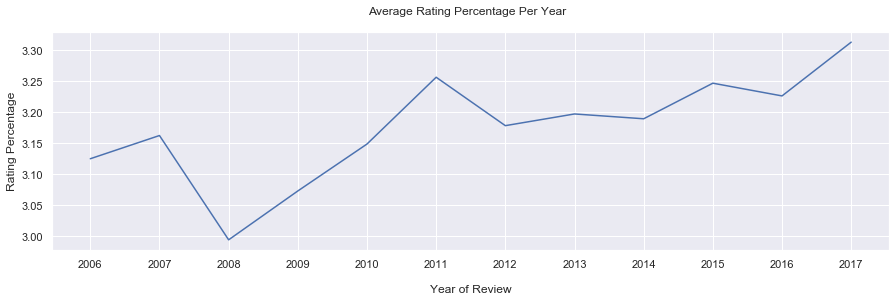

In [33]:
d5 = foc.groupby('review_year').aggregate({'rating':'mean'})
d5 = d5.reset_index()
sns.set()
plt.figure(figsize=(15, 4))
ax = sns.lineplot(x='review_year', y='rating', data=d5)
ax.set(xticks=d5.review_year.values)
plt.xlabel("\nYear of Review")
plt.ylabel("Rating Percentage")
plt.title("Average Rating Percentage Per Year  \n")
plt.show()

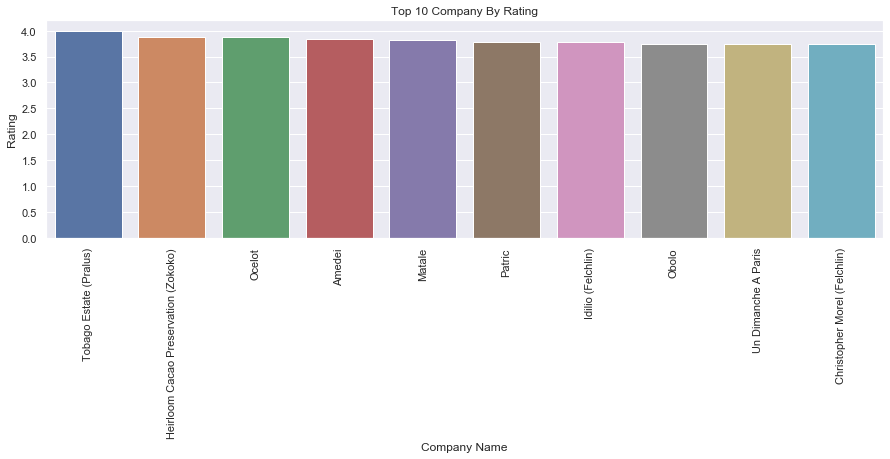

In [34]:
d5 = foc.groupby('company').aggregate({'rating':'mean'})
d5 = d5.sort_values('rating', ascending = False).head(10)
d5 = d5.reset_index()

sns.set()
plt.figure(figsize=(15, 4))
sns.barplot(x=d5.company, y=d5.rating)
plt.xticks(rotation=90)
plt.xlabel("Company Name")
plt.ylabel("Rating")
plt.title("Top 10 Company By Rating")
plt.show()

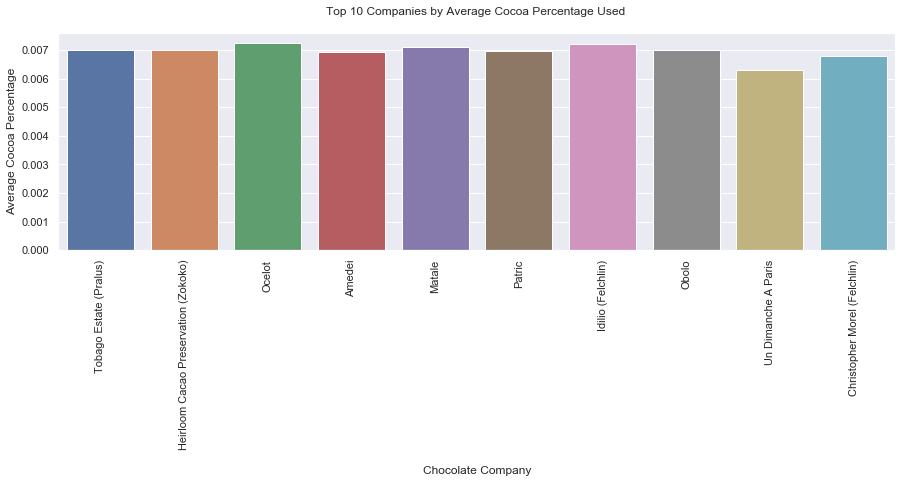

In [35]:
d2 = foc.groupby('company').aggregate({'cocoa_percent':'mean', 'rating':'mean' })
d2 = d2.sort_values('rating', ascending=False).head(10)
d2 = d2.reset_index()
sns.set()
plt.figure(figsize=(15, 4))
sns.barplot(x='company', y='cocoa_percent', data=d2)
plt.xticks(rotation=90)
plt.xlabel("\nChocolate Company")
plt.ylabel("Average Cocoa Percentage")
plt.title("Top 10 Companies by Average Cocoa Percentage Used \n")
plt.show()

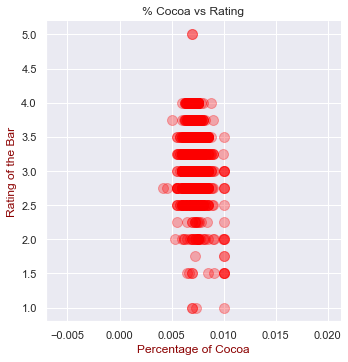

In [36]:
sns.lmplot(x ='cocoa_percent',y='rating',fit_reg=False,scatter_kws={"color":"red","alpha":0.3,"s":100},data=foc)
plt.xlabel('Percentage of Cocoa',size=12,color='darkred')
plt.ylabel('Rating of the Bar',size=12,color='darkred')
plt.title("% Cocoa vs Rating")
plt.show()


Top Chocolate Producing Countries in the World

U.S.A.     764
France     156
Canada     125
England     96
Italy       63
Name: company_location, dtype: int64


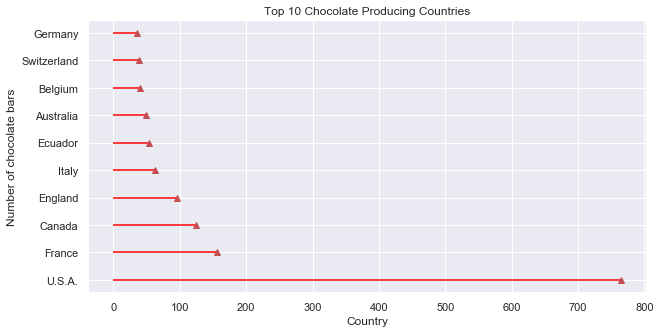

In [37]:
print ('Top Chocolate Producing Countries in the World\n')
country=list(foc['company_location'].value_counts().head(10).index)
choco_bars=list(foc['company_location'].value_counts().head(10))
prod_ctry=dict(zip(country,choco_bars))
print(foc['company_location'].value_counts().head())

plt.figure(figsize=(10,5))
plt.hlines(y=country,xmin=0,xmax=choco_bars,color='red')
plt.plot(choco_bars,country,"r^")
plt.xlabel('Country')
plt.ylabel('Number of chocolate bars')
plt.title("Top 10 Chocolate Producing Countries")
plt.show()

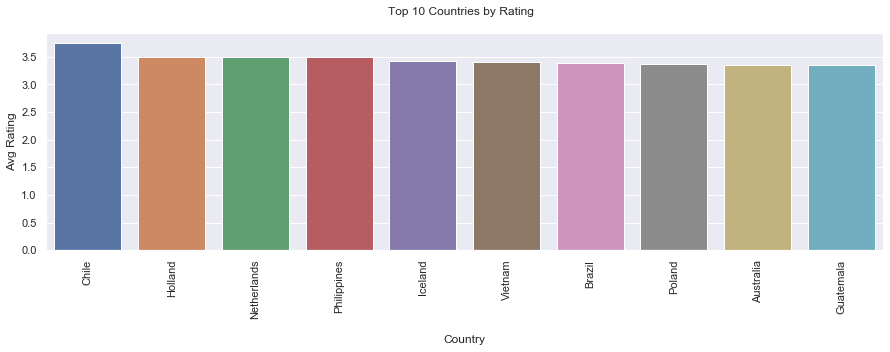

In [38]:
d0 = foc.groupby('company_location').aggregate({'rating':'mean' })
d0 = d0.sort_values('rating', ascending=False).head(10)
d0 = d0.reset_index()

sns.set()
plt.figure(figsize=(15, 4))
sns.barplot(x='company_location', y='rating', data=d0)
plt.xticks(rotation=90)
plt.xlabel("\nCountry")
plt.ylabel("Avg Rating")
plt.title("Top 10 Countries by Rating  \n")
plt.show()

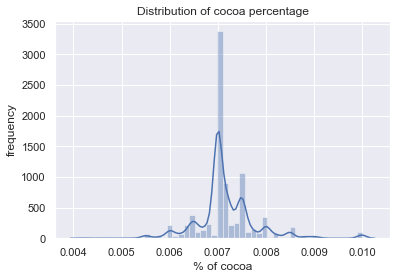

In [39]:
sns.distplot(foc.cocoa_percent)
plt.xlabel("% of cocoa")
plt.ylabel("frequency")
plt.title("Distribution of cocoa percentage");

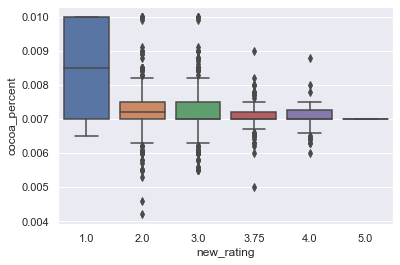

In [40]:
sns.boxplot(x=foc.new_rating, y=foc.cocoa_percent)

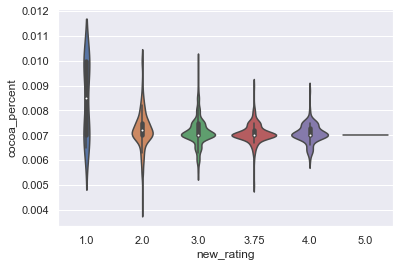

In [41]:
sns.violinplot(x=foc.new_rating, y=foc.cocoa_percent)